In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import  scipy.stats                     as  stats
import  statsmodels.stats.proportion    as  SMP
import  numpy                           as  np
import  pandas                          as  pd
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
## Section-A
### 1A
df=pd.read_csv("Credit.csv")

In [16]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [17]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [18]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [8]:
### 1B
df.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

Inference: There is no Missing Values in the given dataset so imputation is not done.

In [33]:
### 1C
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,0,0,1,0,1


In [34]:
### 1D
df.corr()['Rating']


Income                 0.791378
Limit                  0.996880
Rating                 1.000000
Cards                  0.053239
Age                    0.103165
Education             -0.030136
Balance                0.863625
Gender_Female          0.008885
Student_Yes           -0.002028
Married_Yes            0.036751
Ethnicity_Asian       -0.035999
Ethnicity_Caucasian   -0.001070
Name: Rating, dtype: float64

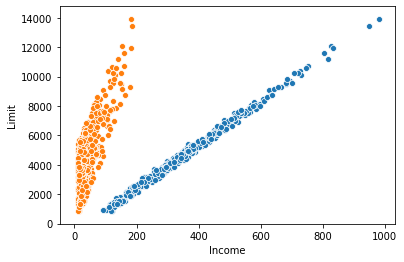

In [35]:
sns.scatterplot('Rating','Limit',data=df)
sns.scatterplot('Income','Limit',data=df)

In [36]:
df.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656,-0.010738,0.019632,0.035652,-0.017137,-0.019701
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697,0.009397,-0.006015,0.031155,-0.032427,-0.003081
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625,0.008885,-0.002028,0.036751,-0.035999,-0.001070
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456,-0.022658,-0.026164,-0.009695,0.005591,-0.005631
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835,0.004015,-0.029844,-0.073136,-0.059623,-0.000822
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062,-0.005049,0.072085,0.048911,0.029586,-0.037725
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000,0.021474,0.259018,-0.005673,-0.009812,-0.003288
Gender_Female,-0.010738,0.009397,0.008885,-0.022658,0.004015,-0.005049,0.021474,1.000000,0.055034,0.012452,0.025425,-0.009831
Student_Yes,0.019632,-0.006015,-0.002028,-0.026164,-0.029844,0.072085,0.259018,0.055034,1.000000,-0.076974,0.053534,-0.048334
Married_Yes,0.035652,0.031155,0.036751,-0.009695,-0.073136,0.048911,-0.005673,0.012452,-0.076974,1.000000,0.088595,0.011418


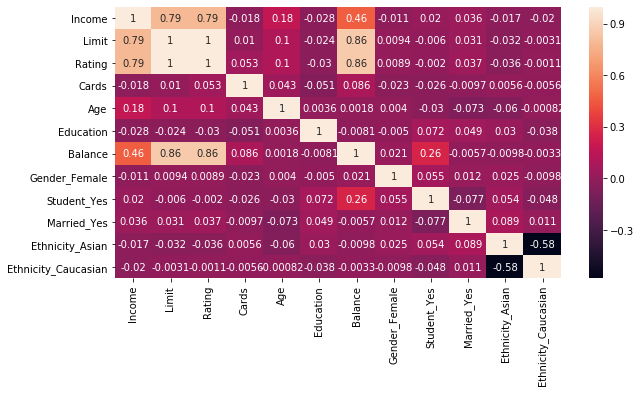

In [60]:
## 1E
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

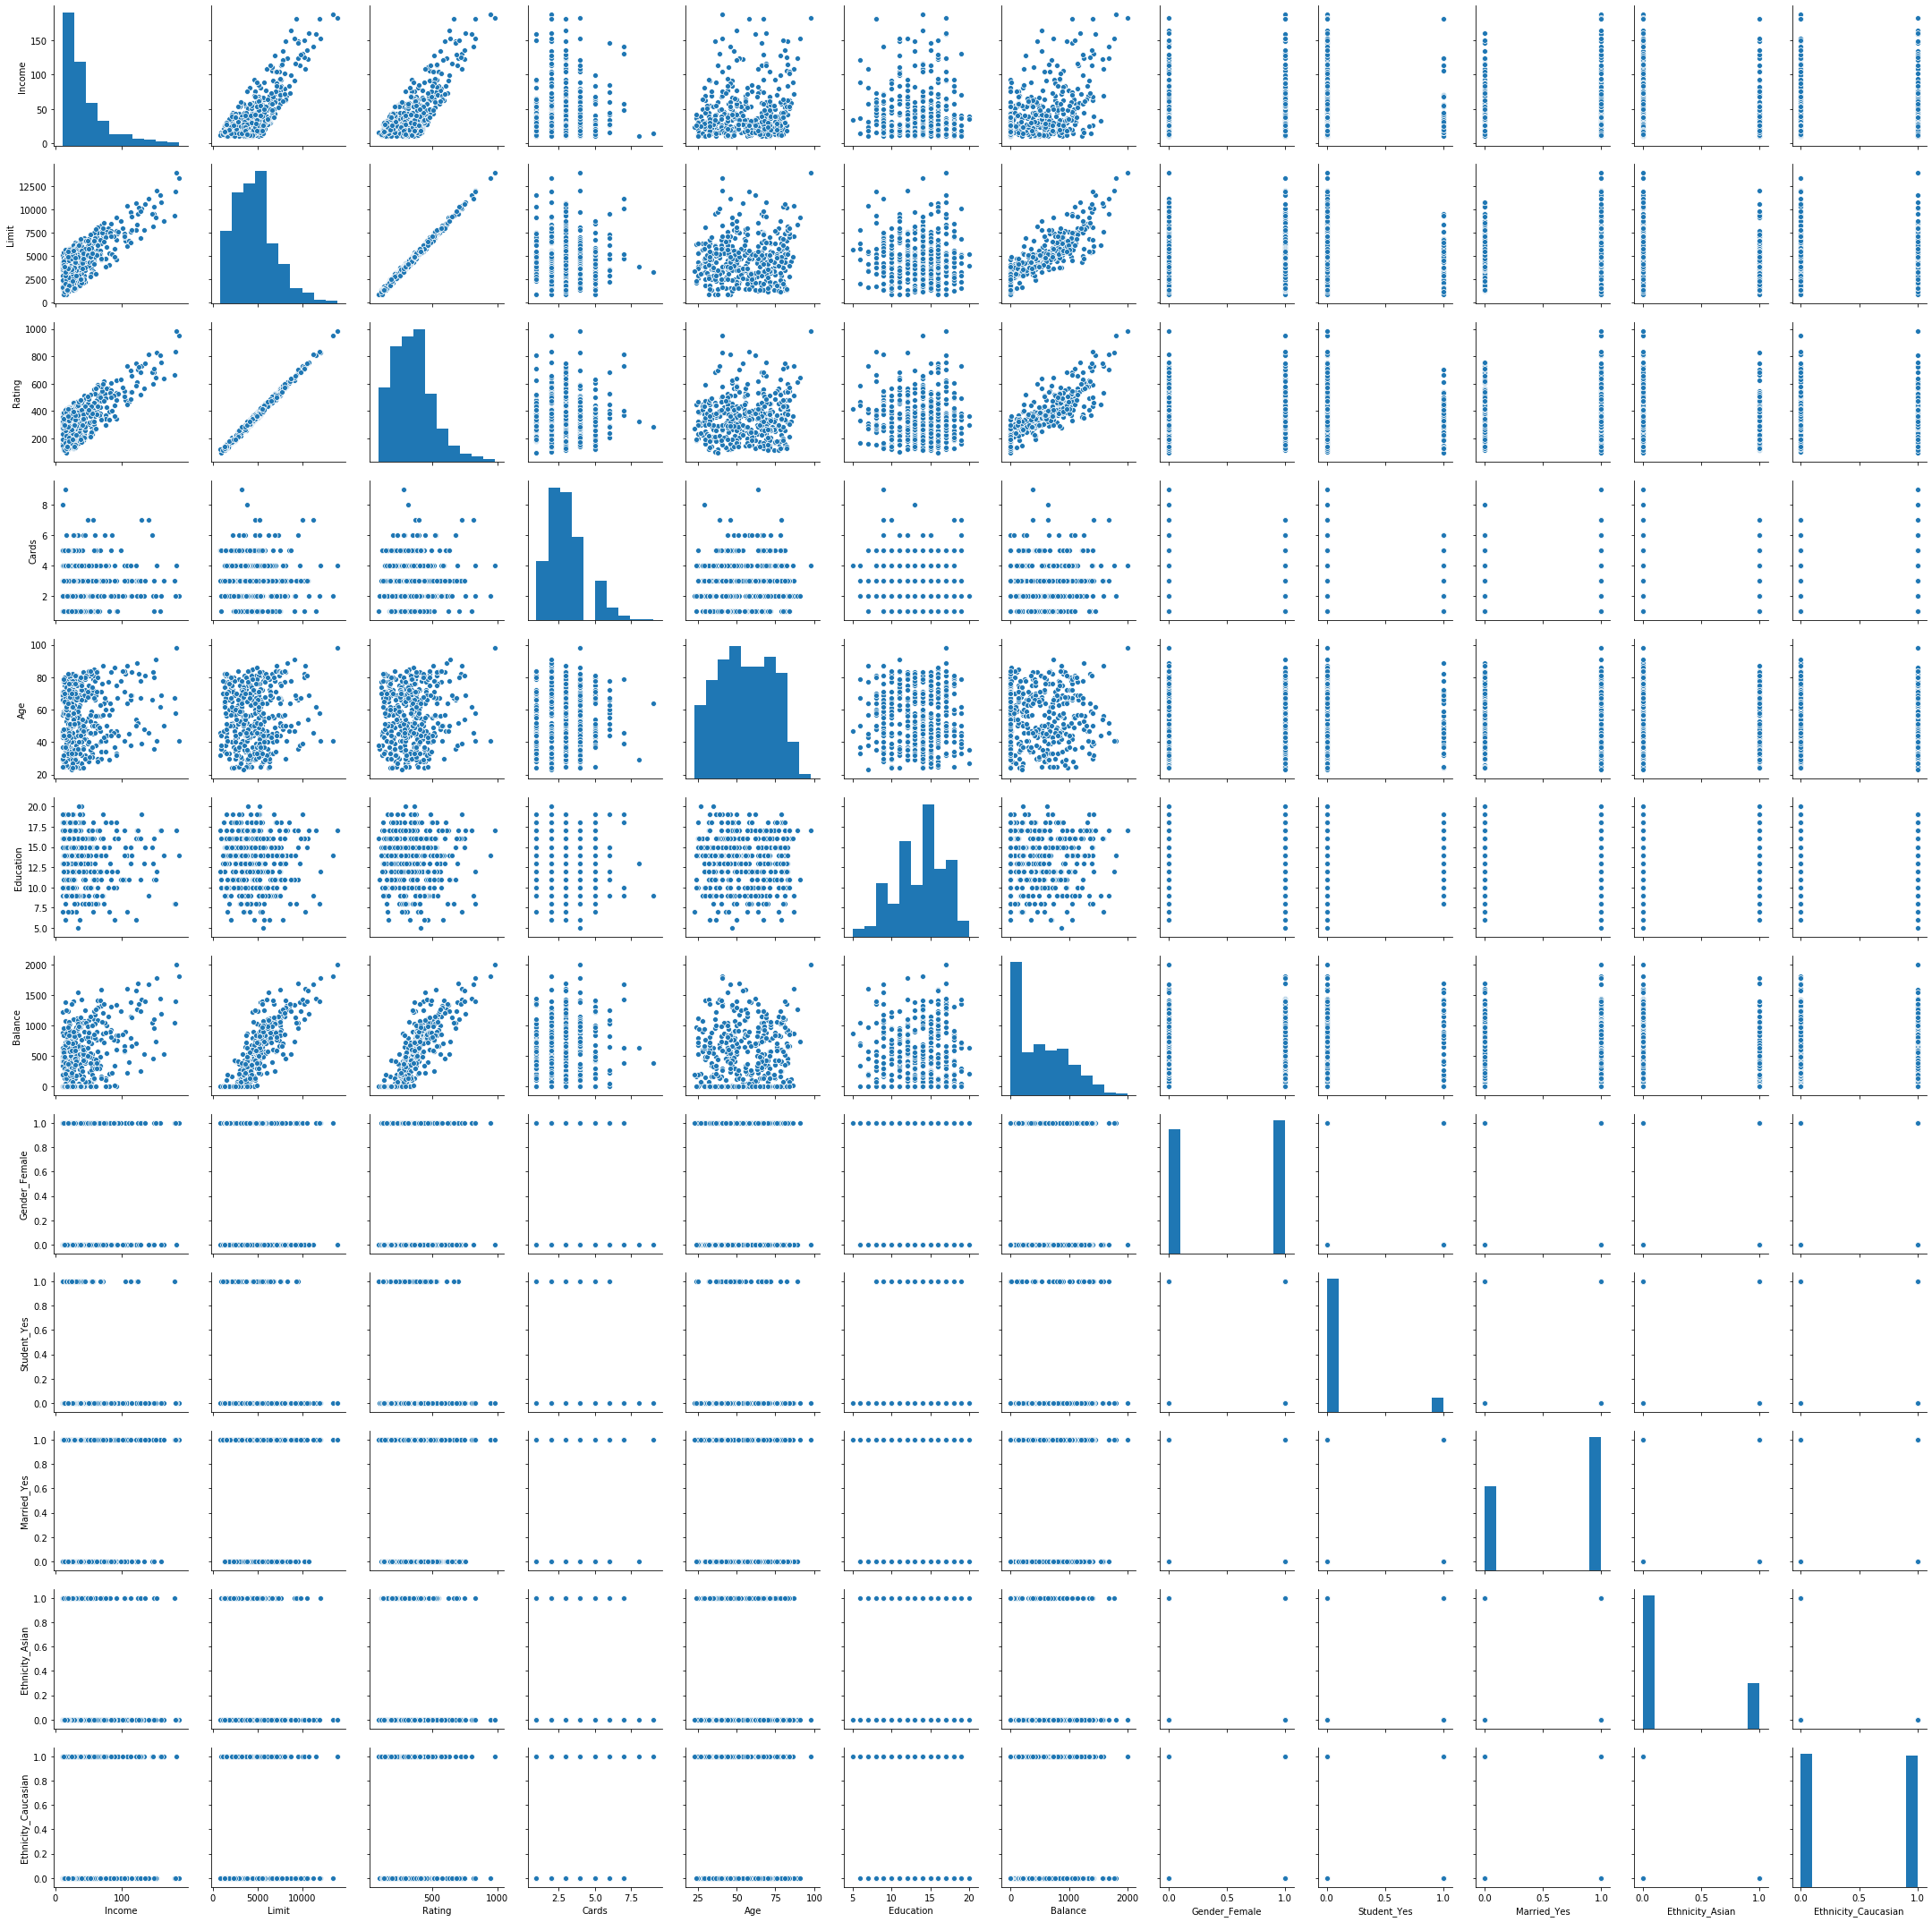

In [61]:
sns.pairplot(df)

In [37]:
##2.1 

y=df['Balance']
X=df.drop('Balance',axis=1)
xc=sm.add_constant(X)

In [38]:
##2.2
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [39]:
##2.3
model=sm.OLS(y,xc).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          1.11e-253
Time:                        10:49:03   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Income                 -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                   0.1909      0.033      5.824      0.000       0.126       0.255
Rating                  1.1365      0.491      2.315      0.021       0.171       2.102
Cards                  17.7245      4.341      4.083      0.000       9.190      26.259
Age                    -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education              -1.0989      1.598     -0.688      0.492      -4.241       2.043
Gender_Female         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student_Yes           425.7474     16.723     25.459      0.000     392.869     458.626
Married_Yes            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity_Asian        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity_Caucasian    10.1070     12.210      0.828      0.408     -13.899      34.113
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Inference:
    Here the R-squared:	0.955 And Adj. R-squared:	0.954

In [41]:
model.pvalues

const                   6.730600e-34
Income                 7.372312e-116
Limit                   1.205974e-08
Rating                  2.112213e-02
Cards                   5.401200e-05
Age                     3.743127e-02
Education               4.920746e-01
Gender_Female           2.832368e-01
Student_Yes             8.854521e-85
Married_Yes             4.107256e-01
Ethnicity_Asian         2.347047e-01
Ethnicity_Caucasian     4.083088e-01
dtype: float64

In [42]:
model.pvalues.values

array([6.73059951e-034, 7.37231242e-116, 1.20597425e-008, 2.11221287e-002,
       5.40120049e-005, 3.74312744e-002, 4.92074573e-001, 2.83236844e-001,
       8.85452103e-085, 4.10725575e-001, 2.34704673e-001, 4.08308819e-001])

# 3 A

In [72]:
## 3 A
tabel = pd.DataFrame(index = ['Dataset Size','RMSE','RMSEPCT','R^2','Adj R^2'])
lr = LinearRegression()
def func(a,b):
    x_train, x_test, y_train, y_test = train_test_split(a, b, test_size = 0.30, random_state = 45)
    lr.fit(x_train,y_train)
    y_pred_train=lr.predict(x_train)
    y_pred_test=lr.predict(x_test)
    train_r2 = r2_score(y_train,y_pred_train)
    test_r2 = r2_score(y_test,y_pred_test)
    adj_r2_train = 1 - (1-train_r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
    adj_r2_test = 1 - (1-test_r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
    labels=['Dataset Size','RMSE','RMSEPCT','R^2','AdjR^2']
    scores=pd.DataFrame({'Train':[x_train.shape,rmse_train,rmse_train/100,train_r2, adj_r2_train],
                         'Test':[x_test.shape,rmse_test,rmse_test/100,test_r2, adj_r2_train]},index=labels)
    return scores
x = df.drop('Balance',axis=1)
y = df['Balance']
func(x,y)

,Train,Test
Dataset Size,"(280, 11)","(120, 11)"
RMSE,102.154,88.8543
RMSEPCT,1.02154,0.888543
R^2,0.949793,0.962693
AdjR^2,0.94837,0.94837


### 3 B

In [73]:
### 3B
tabel = pd.DataFrame(index = ['Dataset Size','RMSE','RMSEPCT','R^2','Adj R^2'])
lr = LinearRegression()
def func(a,b):
    x_train, x_test, y_train, y_test = train_test_split(a, b, test_size = 0.30, random_state = 45)
    lr.fit(x_train,y_train)
    y_pred_train=lr.predict(x_train)
    y_pred_test=lr.predict(x_test)
    train_r2 = r2_score(y_train,y_pred_train)
    test_r2 = r2_score(y_test,y_pred_test)
    adj_r2_train = 1 - (1-train_r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
    adj_r2_test = 1 - (1-test_r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
    labels=['Dataset Size','RMSE','RMSEPCT','R^2','AdjR^2']
    scores=pd.DataFrame({'Train':[x_train.shape,rmse_train,rmse_train/100,train_r2, adj_r2_train],
                         'Test':[x_test.shape,rmse_test,rmse_test/100,test_r2, adj_r2_train]},index=labels)
    return scores
x = df.drop(['Balance','Limit','Rating','Education'],axis=1)
y = df['Balance']
#Dropped due to multicollinearity
func(x,y)

,Train,Test
Dataset Size,"(280, 8)","(120, 8)"
RMSE,382.137,401.973
RMSEPCT,3.82137,4.01973
R^2,0.297433,0.236462
AdjR^2,0.283058,0.283058
